In [1]:
import json
import os, sys, re
import numpy as np
import pickle as pkl

In [2]:
textrecog_decoded = pkl.load(open('textrecog_decoded.pkl','rb'))
target = pkl.load(open('target.pkl','rb'))

## chars2vec

In [3]:
import chars2vec
import sklearn.decomposition
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
# Load Inutition Engineering pretrained model
# Models names: 'eng_50', 'eng_100', 'eng_150', 'eng_200', 'eng_300'
c2v_model = chars2vec.load_model('eng_100')

In [5]:
words = ['Natural', 'Language', 'Understanding',
         'Naturael', 'Longuge', 'Updderctundjing',
         'Motural', 'Lamnguoge', 'Understaating',
         'Naturrow', 'Laguage', 'Unddertandink',
         'Nattural', 'Languagge', 'Umderstoneding', 'furqan']

In [6]:
# Create word embeddings
word_embeddings = c2v_model.vectorize_words(words)

In [7]:
word_embeddings.shape

(16, 100)

In [8]:
# Project embeddings on plane using the PCA
projection_2d = sklearn.decomposition.PCA(n_components=2).fit_transform(word_embeddings)

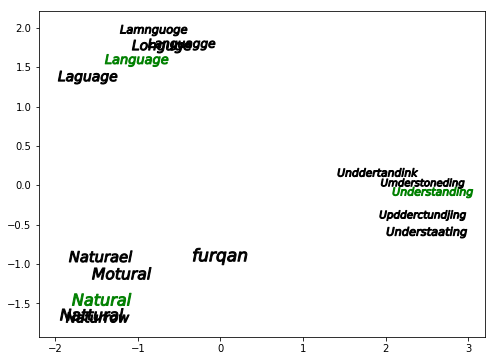

In [9]:
# Draw words on plane
f = plt.figure(figsize=(8, 6))

for j in range(len(projection_2d)):
    plt.scatter(projection_2d[j, 0], projection_2d[j, 1],
                marker=('$' + words[j] + '$'),
                s=500 * len(words[j]), label=j,
                facecolors='green' if words[j]
                            in ['Natural', 'Language', 'Understanding'] else 'black')

plt.show()

## Textrecog embeddings

In [10]:
embeddings = []
for image_text in textrecog_decoded:
    word_embeddings = c2v_model.vectorize_words(image_text)
    embeddings.append(word_embeddings)

In [11]:
len(embeddings)

560

In [12]:
pkl.dump(embeddings, open('textrecog_chars2vec_embedding.pkl', 'wb'))